# Logistic regression

# Dataset:
German Credit

# Objective
Estimate default probabilities using logistic regression

# 1. Load Libraries and data

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_excel('GermanCredit.xlsx')
df.head()

,Creditability,CreditAmount,DurationOfCreditInMonths
0,1,1049,18
1,1,2799,9
2,1,841,12
3,1,2122,12
4,1,2171,12


# 2. Check how many records do we have


In [6]:
df.shape

(1000, 3)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Creditability             1000 non-null   int64
 1   CreditAmount              1000 non-null   int64
 2   DurationOfCreditInMonths  1000 non-null   int64
dtypes: int64(3)
memory usage: 23.6 KB


In [8]:
df.describe()

,Creditability,CreditAmount,DurationOfCreditInMonths
count,1000.000000,1000.00000,1000.000000
mean,0.700000,3271.24800,20.903000
std,0.458487,2822.75176,12.058814
min,0.000000,250.00000,4.000000
25%,0.000000,1365.50000,12.000000
50%,1.000000,2319.50000,18.000000
75%,1.000000,3972.25000,24.000000
max,1.000000,18424.00000,72.000000


# 3. Plot Histogram for column 'CreditAmount'

<AxesSubplot:>

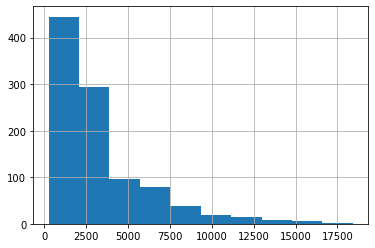

In [9]:
df['CreditAmount'].hist()

array([[<AxesSubplot:title={'center':'Creditability'}>,
        <AxesSubplot:title={'center':'CreditAmount'}>],
       [<AxesSubplot:title={'center':'DurationOfCreditInMonths'}>,
        <AxesSubplot:>]], dtype=object)

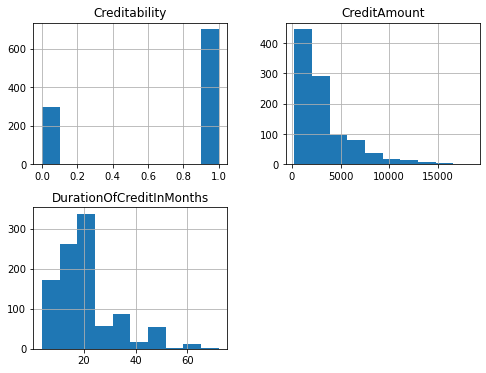

In [12]:
df.hist(figsize=(8,6))

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

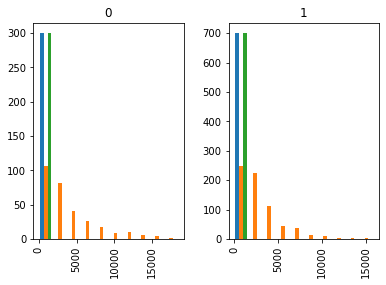

In [11]:
df.hist(by='Creditability')

# 3b. Create creditability dataframe

In [19]:
crediability0=df[df['Creditability']==0]
crediability1=df[df['Creditability']==1]


# 4. Concatenate the above 2 dataframes and give the total of Credibiliity0 and Credibiliity1

In [22]:
df_concat=pd.concat([crediability0,crediability1])
df_concat

,Creditability,CreditAmount,DurationOfCreditInMonths
22,0,2384,36
45,0,1216,18
47,0,1864,18
97,0,4455,36
110,0,3959,15
...,...,...,...
746,1,2760,24
747,1,5507,24
748,1,1199,9
749,1,2892,24


# 5. Plot Creditworthiness plot for Credibility == 0 and also ==1

array([<AxesSubplot:title={'center':'CreditAmount'}, xlabel='[Creditability]'>,
       <AxesSubplot:title={'center':'DurationOfCreditInMonths'}, xlabel='[Creditability]'>],
      dtype=object)

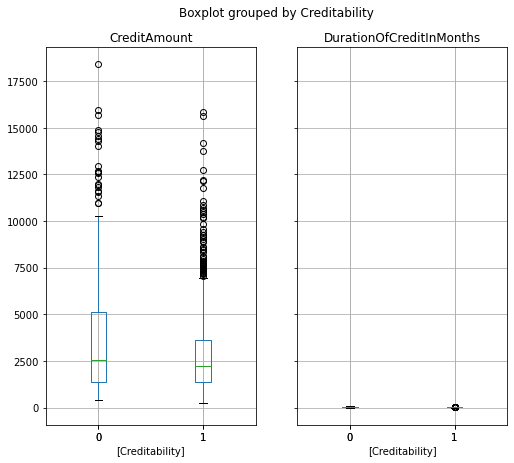

In [30]:
df.boxplot(by="Creditability",figsize=(8,7))

# 6. Prepare input data for the model

In [32]:
df.isnull().sum() #no null value

Creditability               0
CreditAmount                0
DurationOfCreditInMonths    0
dtype: int64

In [36]:
duplicate_data=df[df.duplicated()]
print("Duplicate Values",duplicate_data.shape[0])
df.drop_duplicates(inplace=True) # for our model duplicate values are not good so i am removing duplicate values

Duplicate Values 7


In [31]:
df.skew() 
# data is not not normal
# need some transforming techniques
# because i didnt want to remove the outliers beacuse for me the data is precious if my client say to remove the outliers then i will

Creditability              -0.874183
CreditAmount                1.949594
DurationOfCreditInMonths    1.094184
dtype: float64

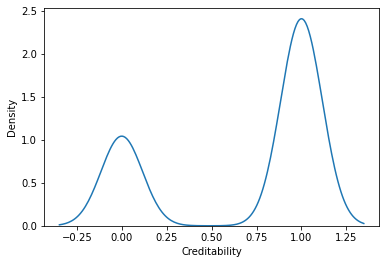

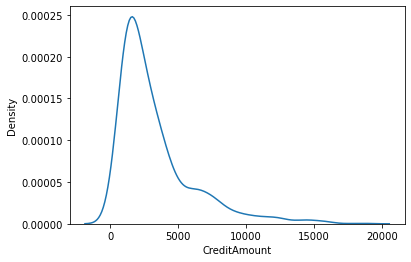

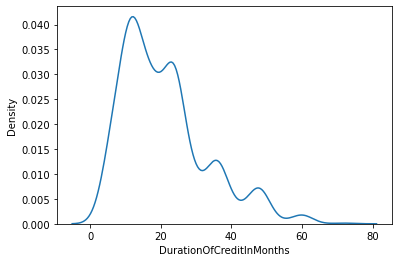

In [41]:
for i in df.columns:
    sns.kdeplot(df[i])
    plt.show() # we didnt want any transformation technique on our target variable
    

In [43]:
from sklearn.preprocessing import PowerTransformer
pw=PowerTransformer()
for i in df.drop("Creditability",axis="columns").columns:
    df[i]=pw.fit_transform(df[[i]])
    
df.skew()
    

Creditability              -0.863221
CreditAmount                0.005059
DurationOfCreditInMonths   -0.004890
dtype: float64

Normality is near to zero so data is normal now

# 7. Fit logistic regression model

In [49]:
import statsmodels.api as sm

x=df.drop("Creditability",axis="columns")
y=df['Creditability']
X=sm.add_constant(x)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,train_size=.75,random_state=10)
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(x_train,y_train)

y_pred=log.predict(x_test)

# 8. Test accuracy calculation

In [56]:
from sklearn import metrics
print("Accuracy",metrics.accuracy_score(y_test,y_pred))
print("F1 SCORE", metrics.f1_score(y_test,y_pred))
print("AUC SCORE",metrics.roc_auc_score(y_test,y_pred))
print("Classification Report \n",metrics.classification_report(y_test,y_pred))

Accuracy 0.7309236947791165
F1 SCORE 0.8416075650118204
AUC SCORE 0.5211244718882028
Classification Report 
               precision    recall  f1-score   support

           0       0.57      0.06      0.11        68
           1       0.74      0.98      0.84       181

    accuracy                           0.73       249
   macro avg       0.65      0.52      0.47       249
weighted avg       0.69      0.73      0.64       249



# 9. Build a confusion matrix

<AxesSubplot:>

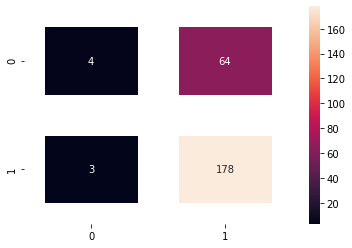

In [62]:
cm=metrics.confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,linewidths=40,fmt='.8g')

# 10.  Predicted Probability distribution Plots for Defaults and Non Defaults

In [73]:
pred_prob=log.predict_proba(x_test)


array([[<AxesSubplot:title={'center':'Defaults'}>,
        <AxesSubplot:title={'center':'Non_defaults'}>]], dtype=object)

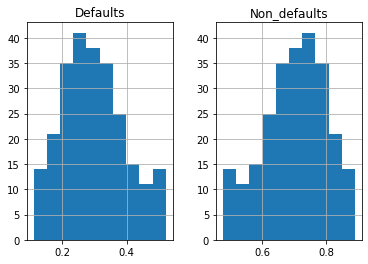

In [76]:
predicted_probability=pd.DataFrame(pred_prob,columns=['Defaults','Non_defaults'])
predicted_probability.hist()